<h1><center> 미국 경찰 총격데이터 분석 </center></h1>
<h3><div style = "text-align : right">201600177 문헌정보학과 이동헌</div></h3>

<h4>서론</h4>  
 데이터분석 과제를 실행하기 위해 전공, 취미 등 다양한 분야와 공공데이터포털, kaggle 등 많은 경로로 데이터를 찾아보던 중 한 데이터가 내 눈에 띄었다.  
 
 
 [Kaggle : US Police Shootings](https://www.kaggle.com/ahsen1330/us-police-shootings/)  
 
 이 데이터를 보자 얼마전 읽었던 말콤 글래드웰의 "타인의 해석"이라는 책에서 저자가 주장한 내용이 생각나서 이 데이터세트를 선택했다.  
 
 >'샌드라 블랜드 사건은 인종문제도, 무능하거나 나쁜 경찰의 문제도 아닌 사람의 소통에 관한 문제다.'    


저자는 사람간의 투명성문제, 캔자스 시티의 범죄소탕 사례 등을 예로 들며 샌드라 블랜드 사건이 경찰이 사람을 의심하게 만드는 제도와 사람간의 오해가 쌓이고 쌓여 생긴 문제라고 해석했다. 그의 논거를 따라가며 마침내 결론을 읽을 때 나도 그의 주장이 어느정도 맞다고 동의하게 되었으며, 마침 최근에도 흑인에 대한 경찰의 총격사건이 화두로 올랐기에 이 데이터세트를 고를수밖에 없었다. 이를 위해 이번 프로젝트는 소수인종, 즉 히스패닉이나 흑인, 아시안들이 같은 조건하에서 경찰에게 과잉진압을 당할 확률이 높은지 알아봄으로써 앞서 소개했던 저자의 주장이 샌드라 블랜드 사건뿐만이 아닌 전체적으로 일반화 될 수 있을지 검증하는것을 목표로 할것이다. 또한 CRISP-DM을 최대한 따라감으로써 최대한 실제 프로젝트와 유사하게 진행할 것이다.

<h4>맥락과 상황에 대한 이해</h4>

 우선 경찰이 어느 상황에서 무기를 사용할 수 있으며 총격을 가하는지부터 명확하게 정의하고 넘어가야 특정 상황에서 경찰이 과잉진압을 했다라고 말할 수 있을것이다. 이를 위해 우선 데이터셋의 무대가 되는 미국의 공무원의 정당방위 살인에 대해서 알아보자. 정당방위 살인에 대해 가장 잘 설명해둔 캘리포니아 주법 Sec.196을 인용하겠다.
 
 >196. 다음과 같은 상황에서 공무원이 그들의 명령을 수행하거나 도움을 제공하는 행동에서 행해진 살인은 정당화될수 있다.
 >> (a) 사법부에 의해 인정될 때  
 >> (b) 공무원이 835a에 따라 무력행사를 행하다 살인이 발생했을 때
 
 >835a. ...(중략)...
 >>> (2) ... 사람의 생명을 구하기 위해서만 공무원이 무력집행을 사용하게 하는 것이 사법부의 의도이다.  
 
 > ...
 
 >> (c) (1)과 (b)조에도 불구하고 공무원이 상황에 대한 전체적 판단 후 다음 근거들을 기반으로 치명적인 무력집행이 필요하다 합리적으로 믿고 사용한 경우 정당화 될 수 있다.
 >>>> (A) 공무원이나 다른 사람에게 임박한 죽음의 위협이나 심각한 부상을 방어하기 위해.  
 >>>> (B) 즉시 체포되지 않으면 다른사람에게 심각한 부상이나 살인을 저지를것이라 합리적으로 믿는경우 ...(중략)...
 
즉 1.사법부에 의해서 인정되거나 2.요주의 용의자가 도망칠때, 3.상대가 즉시 타인에게 심각한 상해 이상을 입힐 수 있는 경우 치명적 무력행사, 즉 총기발포가 가능하고 요약할 수 있다. 이번 분석에서는 이러한 상황에 맞지 않을때 경찰이 발포한 경우를 과잉진압이라 정의할 것다.

또한 흥미로운 구문을 발견했다.
>835a.(a)(5) 신체적, 정신적 혹은 지능적 발달장애가 있는 개인은 명령을 이해하거나 수행하는데 문제가 있을 수 있어서 더 높은 수준의 무력진압을 경험할 가능성이 높다. ...(중략)

장애인의 경우 더 거칠게 다뤄질수 있다는 구문이다. 이것 또한 실제로 그러한지 데이터 분석을 통해 알아보자.

<h4>데이터에 대한 이해</h4>

US Police Shooting Dataset은 다음과 같은 column으로 구성되어있다.

In [3]:
import pandas as pd
import numpy as np

shootings = pd.read_csv('shootings.csv', parse_dates=['date'], index_col=0,)
shootings = shootings.sort_index(ascending=True)
shootings.columns

Index(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'arms_category'],
      dtype='object')

|컬럼명|설명|
|:--:|:--|
|id|사건 식별자|
|name|발포자 이름|
|date|년-월-일 포맷|
|manner_of_death|어떻게 살해당했는가? ex)총격,테이저건|
|armed|무장|
|age|피격자의 나이|
|gender|피격자의 성별|
|race|피격자의 |
|city|사건발생도시|
|state|사건발생주|
|signs_of_mental_illness|피격자가 정신이상의 징후가 있었나?|
|threat_level|위협 수준|
|flee|도주 여부|
|body_camera|바디캠이 켜져있었는지 여부|
|arms_category|무장 카테고리|


In [4]:
shootings.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
id,,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 3 to 5925
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     4895 non-null   object        
 1   date                     4895 non-null   datetime64[ns]
 2   manner_of_death          4895 non-null   object        
 3   armed                    4895 non-null   object        
 4   age                      4895 non-null   float64       
 5   gender                   4895 non-null   object        
 6   race                     4895 non-null   object        
 7   city                     4895 non-null   object        
 8   state                    4895 non-null   object        
 9   signs_of_mental_illness  4895 non-null   bool          
 10  threat_level             4895 non-null   object        
 11  flee                     4895 non-null   object        
 12  body_camera              4895 non-

515kb로 다루기 무리없는 데이터기에 데이터 용량을 축소하는 작업은 실시하지 않을 것이다. 하지만 좀더 분석하기쉽도록 몇몇 열들은 데이터 특성에 맞게 조정을 할것이다.

컬럼의 unique갯수가 52개 미만인 object type의 columns의 dtype을 category로 조정하여 추후 분석시 좀더 편하도록 미리 세팅해둘것이다. 

In [6]:
for n in shootings.columns :
    if (shootings[n].nunique() < 52) and (shootings[n].dtype == 'O'):
        shootings[n] = shootings[n].astype('category')
#컬럼중 unique value 갯수가 < 52이면서 object 타입인 컬럼의 dtype을 category로 바꿔줌.
shootings.age = shootings.age.astype(int)
#age는 나이기때문에 int로 넣어줌.

In [7]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 3 to 5925
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     4895 non-null   object        
 1   date                     4895 non-null   datetime64[ns]
 2   manner_of_death          4895 non-null   category      
 3   armed                    4895 non-null   object        
 4   age                      4895 non-null   int32         
 5   gender                   4895 non-null   category      
 6   race                     4895 non-null   category      
 7   city                     4895 non-null   object        
 8   state                    4895 non-null   category      
 9   signs_of_mental_illness  4895 non-null   bool          
 10  threat_level             4895 non-null   category      
 11  flee                     4895 non-null   category      
 12  body_camera              4895 non-

주목할 점은 id를 index로 넣고 오름차순으로 sort를 했음에도 불구하고 3부터 시작된다는 것이다.   
원본 깃허브나 파생 kaggle들을 확인해도 이 이유를 알 수 없었는데, 아마 data source인 워싱턴 포스트쪽의 db에서 사실이 아닌것으로 확인되어 삭제된것일수 있다.  
우리입장에서는 크게 중요한 점이 아니니 데이터를 다루기 쉽게 인덱스를 리셋해버리겠다.

In [8]:
shootings = shootings.reset_index(drop=True)
shootings

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Joshua Johnson,2020-04-22,shot,toy weapon,35,M,Black,Houston,TX,False,attack,Foot,False,Other unusual objects
4891,Hannah Fizer,2020-06-13,shot,unarmed,25,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4892,William Slyter,2020-06-13,shot,gun,22,M,White,Kansas City,MO,False,other,Other,False,Guns
4893,Nicholas Hirsh,2020-06-15,shot,gun,31,M,White,Lawrence,KS,False,attack,Car,False,Guns


우선 총격발생 추이를 확인해보자.

<ipython-input-10-770283c111e2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels = dat.value_counts().sort_index().index.str[2:],


<AxesSubplot:title={'center':'연/월별 경찰 총격 사망자 선그래프'}>

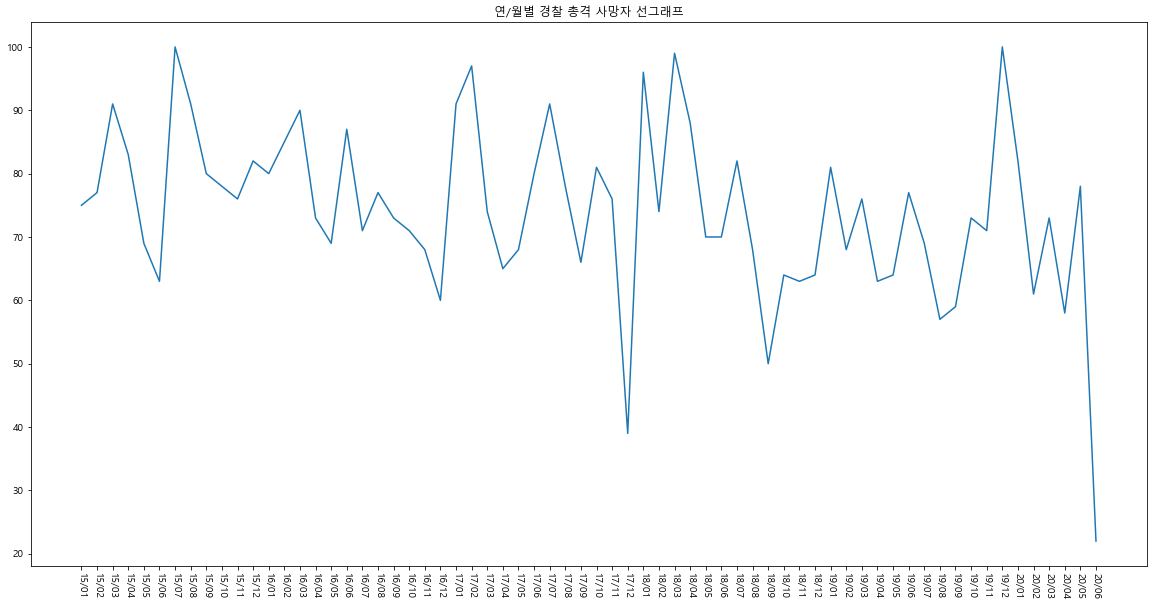

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


dat = shootings['date'].dt.strftime('%Y/%m')
fig,ax = plt.subplots(figsize = [20,10])
plt.rcParams['font.family'] = 'Malgun Gothic'
g = sns.lineplot(x = dat.value_counts().sort_index().index,
                 y = dat.value_counts().sort_index().values)
g.set_xticklabels(labels = dat.value_counts().sort_index().index.str[2:],
                  rotation = -90)
g.set_title('연/월별 경찰 총격 사망자 선그래프')
g

마지막 20년 6월의 경우 횟수가 20회정도에서 돌기에 어? 총격사건이 많이 줄은것인가? 할 수 있는데 사실 6월12일까지, 즉 절반도 안되는 기간동안 수집했기에 자연히 적어진것이다. 


17년 12월의경우 총격 사건이 확연히 적어진 것을 볼 수있는데 해당 월의 뉴스를 찾아봐도 28일부터 시리아내전이 발발한것을 빼고는 특별한것을 찾을수 없었기에 이유를 알 순 없었다

그다음으론 인종 ~ 무장여부(무장 카테고리)로 피벗테이블을 만들어볼것이다. 우리에 목적에 완벽하게 맞는 예시는 아니지만, 어느정도 insight를 제공해줄것이라 생각된다.

In [24]:
shootings.pivot_table(index = 'race',
                      columns = 'arms_category',
                      aggfunc = 'size',
                      fill_value = 0)

arms_category,Blunt instruments,Electrical devices,Explosives,Guns,Hand tools,Multiple,Other unusual objects,Piercing objects,Sharp objects,Unarmed,Unknown,Vehicles
race,,,,,,,,,,,,
Asian,5,0,1,35,0,3,2,1,31,7,8,0
Black,20,9,0,766,1,11,43,4,170,123,108,43
Hispanic,30,4,1,448,0,13,40,8,189,63,89,17
Native,2,1,0,41,0,0,1,1,19,4,8,1
Other,0,0,0,19,0,2,0,1,14,5,5,2
White,65,10,2,1455,0,25,106,14,395,146,200,58


In [37]:
shootings['race'].isin(['White']).sum() / shootings['race'].isin(['Black']).sum()
# 백인 사망자 수 / 흑인 사망자 수 

1.9075500770416025

백인범죄자의 비율이 2배가량 많지만 비무장 사살당한 경우는 흑인과 크게 차이안나는 모습을 볼수 있다.  
하지만 위협수준과 도주여부와도 고려되지 않았기에 확실하게 차이난다라고 말할순 없다.

그럼 인종별로 위협수준이 공격이 아님과 비무장상태만 row로 남긴뒤 인종~도주여부로 확인해보자.

In [132]:
shootings.query('threat_level not in "attack" and armed in "unarmed"').pivot_table(index = 'race',
                                                                                   columns = 'flee',
                                                                                   aggfunc = 'size',
                                                                                   fill_value = 0)

flee,Car,Foot,Not fleeing,Other
race,,,,
Asian,2,1,3,0
Black,18,16,31,7
Hispanic,17,9,19,3
Native,0,2,1,0
Other,0,0,3,0
White,24,12,45,2


이번에도 흑인과 백인의 차이가 크지 않은 것을 볼 수 있다. 하지만 중요한것은 이 차이가 *통계적으로 유의한가*이다.  

그럼 데이터를 전반적으로 훑어봤으니 백인과 흑인의 과잉진압이 *통계적으로 유의하게* 차이나는지 한번 확인해보자.

그럼 본격적으로 분석에 들어가기위해

1. 흑인이나 다른 소수인종들이 백인에 비해서 더 과잉진압을 많이 당하는가?  

를 검증하기 위한 데이터셋을 만들어보자.


우선 각각 대조군이 백인과 소수인종으로 데이터를 나누고 실제로 과잉진압을 당한 관측값 / 그렇지 않은 관측값 으로 다시 분할할 것이다.

In [83]:
wh = len(shootings.query('race in "White" and flee in "Not fleeing" and armed in "unarmed" and threat_level not in "attack"'))
white_obs = [wh,len(shootings.query('race in "White"')) - wh]
sum(white_obs) == len(shootings.query('race in "White"'))
#white_obs에 백인 과잉진압 관측값 / 그렇지않은 관측값 으로 분할함.
#과잉진압 여부는 도망가지않고, 무장하지도 않았으며, Threat_level도 attack이 아닌 관측값들을 가져왔음.

True

In [84]:
bl = len(shootings.query('race in "Black" and flee in "Not fleeing" and armed in "unarmed" and threat_level not in "attack"'))
black_obs = [bl,len(shootings.query('race in "Black"')) - bl]
sum(black_obs) == len(shootings.query('race in "Black"'))
#black_obs에 흑인 과잉진압 관측값 / 그렇지않은 관측값 으로 분할함.
#과잉진압 여부는 도망가지않고, 무장하지도 않았으며, Threat_level도 attack이 아닌 관측값들을 가져왔음.

True

In [87]:
mi = len(shootings.query('race not in "White" and flee in "Not fleeing" and armed in "unarmed" and threat_level not in "attack"'))
minor_obs = [mi,len(shootings.query('race not in "White"')) - mi]
sum(minor_obs) == len(shootings.query('race not in "White"'))
#minor_obs에 비 백인 과잉진압 관측값 / 그렇지않은 관측값 으로 분할함.
#과잉진압 여부는 도망가지않고, 무장하지도 않았으며, Threat_level도 attack이 아닌 관측값들을 가져왔음.

True

In [109]:
whblmi = pd.DataFrame([white_obs,black_obs,minor_obs], columns=['over','justified'], index = ['white','black','minor'])

whblmi

,over,justified
white,45,2431
black,31,1267
minor,57,2362


다음은  

 2. 장애인이 정상인에 비해 과잉진압을 당할 가능성이 높은가?
 
를 알아보기위해, 대조군을 장애인 / 정상인으로 나눈후 다시 과잉진압 / 그렇지않은 관측값으로 분할해보자.

In [103]:
di = len(shootings.query('signs_of_mental_illness == True and flee in "Not fleeing" and armed in "unarmed" and threat_level not in "attack" '))
dis_obs = [di, len(shootings.query('signs_of_mental_illness == True')) - di]
sum(dis_obs) == len(shootings.query('signs_of_mental_illness == True'))

True

In [104]:
no = len(shootings.query('signs_of_mental_illness == False and flee in "Not fleeing" and armed in "unarmed" and threat_level not in "attack" '))
nor_obs = [no, len(shootings.query('signs_of_mental_illness == False')) - no]
sum(nor_obs) == len(shootings.query('signs_of_mental_illness == False'))

True

In [110]:
disno = pd.DataFrame([dis_obs,nor_obs], columns = ['over','justified'], index = ['disabled','normal'])

disno

,over,justified
disabled,23,1080
normal,79,3713


<h4> 분석 </h4>  

데이터준비가 끝났으니 실제로 분석하며 검증해보는시간이다. 분석은 앞서 말한대로  

1. 흑인이나 다른 소수인종들이 백인에 비해서 더 과잉진압을 많이 당하는가?  
2. 장애인이 정상인에 비해 과잉진압을 당할 가능성이 높은가?  

두가지를 카이제곱 테스트로 넣고 돌려볼것이다. 


In [111]:
from scipy.stats import chi2_contingency

In [126]:
# 1. 흑인이나 다른 소수인종이 백인에 비해서 더 과잉진압을 많이 당하는가?

#백인과 흑인
blwhp = chi2_contingency(whblmi.iloc[0:2,])[1]

#백인과 백인이 아닌인종
blmip = chi2_contingency(whblmi.iloc[[0,2],])[1]

print(blwhp,blmip)

0.2873732613075627 0.2226081840165257


In [128]:
# 2. 장애인이 정상인에 비해 과잉진압을 당할 가능성이 높은가?

dinop = chi2_contingency(disno)[1]

dinop

0.9077443624727666

In [127]:
disno

,over,justified
disabled,23,1080
normal,79,3713


<h4> 해석 </h4>

1. 흑인이나 다른 소수인종이 백인에 비하여 더 과잉진압을 당할 확률이 높은가?

백인과 흑인, 그리고 백인과 백인이 아닌 인종으로 과잉진압과 정당방위의 관측값을 바탕으로 카이제곱테스트를 해본결과 p-value는 각각 0.287, 0.0223으로 나왔다.  
즉 두 경우에서 h1을 기각하고 h0을 채택하며, 인종에 따라 과잉진압 정도는 *통계적으로 유의하게* 차이나지 않는다는 것이다.

2. 장애인이 정상인에 비해 과잉진압을 당할 가능성이 높은가?  

장애인과 정상인의 과잉진압과 정당방위 관측값을 바탕으로 카이제곱테스트를 해본 결과 p-value는 0.908이나왔다.  
즉 h1을 기각하고 h0을 채택하며, 장애여부에 따라 과잉진압 정도는 *통계적으로 유의하게* 차이나지 않는다는 것이다.

<h4> 결론 </h4>  

지금까지 인종별로, 혹은 장애여부에 따라 과잉진압을 당할 확률이 높은가에 대해 알아보기위해 각각의 관측값을 카이제곱테스트로 확인해보았다.  
결과는 모든 경우에서 p-value가 유의수준을 넘지 못해 h1을 기각하고 h0을 채택했기에 인종별로, 혹은 장애여부에 따라 과잉진압을 당할 확률은 낮다로 결론내릴 수 있다.  

즉 처음 서론에서 보았던 말콤 글레드웰의 주장을 어느정도 일반화해서 해석할수도 있긴 하나, 실제로 이 주장을 검증하기 위한 데이터를 확보한것이 아니기에 확정지을순 없다.  